# 3. 다양한 데이터 전처리 기법

## 3-1. 들어가며

### 데이터 준비
---
- 데이터는 관세청 수출입 무역 통계(https://tradedata.go.kr/cts/index.do) 데이터 이다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

csv_file_path = os.getenv('HOME')+'/aiffel/workplace/240523-preprocessing/data/trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


### 학습 목표
---
- 중복된 데이터를 찾아 제거할 수 있고, 결측치(missing data)를 제거하거나 채워 넣을 수 있습니다.
- 데이터를 정규화시킬 수 있습니다.
- 이상치(outlier)를 찾고, 이를 처리할 수 있습니다.
- 범주형 데이터를 원-핫 인코딩할 수 있습니다.
- 연속적인 데이터를 구간으로 나눠 범주형 데이터로 변환할 수 있습니다.

### 학습 목차
---
1. 결측치(Missing Data)
2. 중복된 데이터
3. 이상치(Outlier)
4. 정규화(Normalization)
5. 원-핫 인코딩(One-Hot Encoding)
6. 구간화(Binning)

## 3-2. 결측치(Missing Data)

In [3]:
print('전체 데이터 건수:', len(trade))

전체 데이터 건수: 199


In [8]:
print('컬럼별 결측치 개수')
len(trade) - trade.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [9]:
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [10]:
trade.isnull() # 결측치 여부를 True, False로 반환

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [11]:
trade.isnull().any(axis=1) # 행마다 하나라도 True가 있으면 True

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [12]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [14]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)

In [15]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


수치형 데이터 보완 방법
- 특정 값을 지정해 줄 수 있습니다. 그러나 결측치가 많은 경우, 모두 같은 값으로 대체한다면 데이터의 분산이 실제보다 작아지는 문제가 생길 수 있습니다.
- 평균, 중앙값 등으로 대체할 수 있습니다. 1번에서 특정 값으로 대체했을 때와 마찬가지로 결측치가 많은 경우 데이터의 분산이 실제보다 작아지는 문제가 발생할 수 있습니다.
- 다른 데이터를 이용해 예측값으로 대체할 수 있습니다. 예를 들어 머신러닝 모델로 2020년 4월 미국의 예측값을 만들고, 이 값으로 결측치를 보완할 수 있습니다.
- 시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치를 대체할 수 있습니다. 예를 들어 기온을 측정하는 센서 데이터에서 결측치가 발생할 경우, 전후 데이터의 평균으로 보완할 수 있습니다.

In [16]:
trade[(trade['국가명']=='미국')&((trade['기간']=='2020년 03월')|(trade['기간']=='2020년 05월'))]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [17]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'])/2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [18]:
trade.loc[191, '무역수지'] = (trade.loc[188, '무역수지'] + trade.loc[194, '무역수지'])/2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,1109176.5


## 3-3. 중복된 데이터

In [20]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [21]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [22]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [23]:
trade.drop_duplicates(inplace=True)

**drop_duplicates 예제**
- 공식문서(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

In [27]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [28]:
# Q. 링크의 공식 문서를 참고해서,
# id가 중복된 경우 나중에 들어온 값만 남기는 코드를 작성해보세요!
# ('Kim Sung' 항목이 삭제되어야 합니다.)

df.drop_duplicates(subset=['id'], keep='last', inplace=True)
df

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


## 3-4. 이상치(Outlier)

**이상치 판단**
1. z score
2. IQR method
- 참고자료
    - 이상치 탐지를 하는 세 가지 방법 (https://modulabs.co.kr/blog/outlier-detection/)

**이상치 판단 후**
1. 가장 간단한 방법으로 이상치를 삭제할 수 있습니다. 이상치를 원래 데이터에서 삭제하고, 이상치끼리 따로 분석하는 방안도 있습니다.
2. 이상치를 다른 값으로 대체할 수 있습니다. 데이터가 적으면 이상치를 삭제하기보다 다른 값으로 대체하는 것이 나을 수 있습니다. 예를 들어 최댓값, 최솟값을 설정해 데이터의 범위를 제한할 수 있습니다.
3. 혹은 결측치와 마찬가지로 다른 데이터를 활용하여 예측 모델을 만들어 예측값을 활용할 수도 있습니다.
4. 아니면 binning을 통해 수치형 데이터를 범주형으로 바꿀 수도 있습니다.

### z-score method
---
- abs(df[col] - np.mean(df[col])) : 데이터에서 평균을 빼준 것에 절대값을 취합니다.
- abs(df[col] - np.mean(df[col]))/np.std(df[col]) : 위에서 얻은 값을 표준편차로 나눠줍니다.
- df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index: 값이 z보다 큰 데이터의 인덱스를 추출합니다.

In [29]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [36]:
trade.loc[outlier(trade, '무역수지', 1.8)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [32]:
def not_outlier(df, col, z):
    return df[(df[col]-np.mean(df[col]))/np.std(df[col])<=z].index

In [37]:
trade.loc[not_outlier(trade, '무역수지', 1.8)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,1109176.5
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


### IQR method
---

In [38]:
np.random.seed(2020)
data = np.random.randn(100)
data = np.concatenate((data, np.array([8, 10, -3, -5])))
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

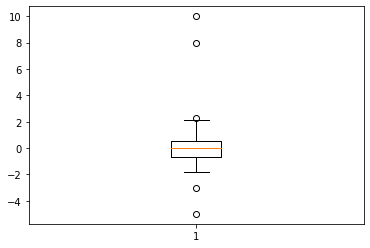

In [39]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

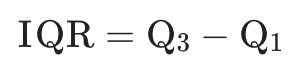
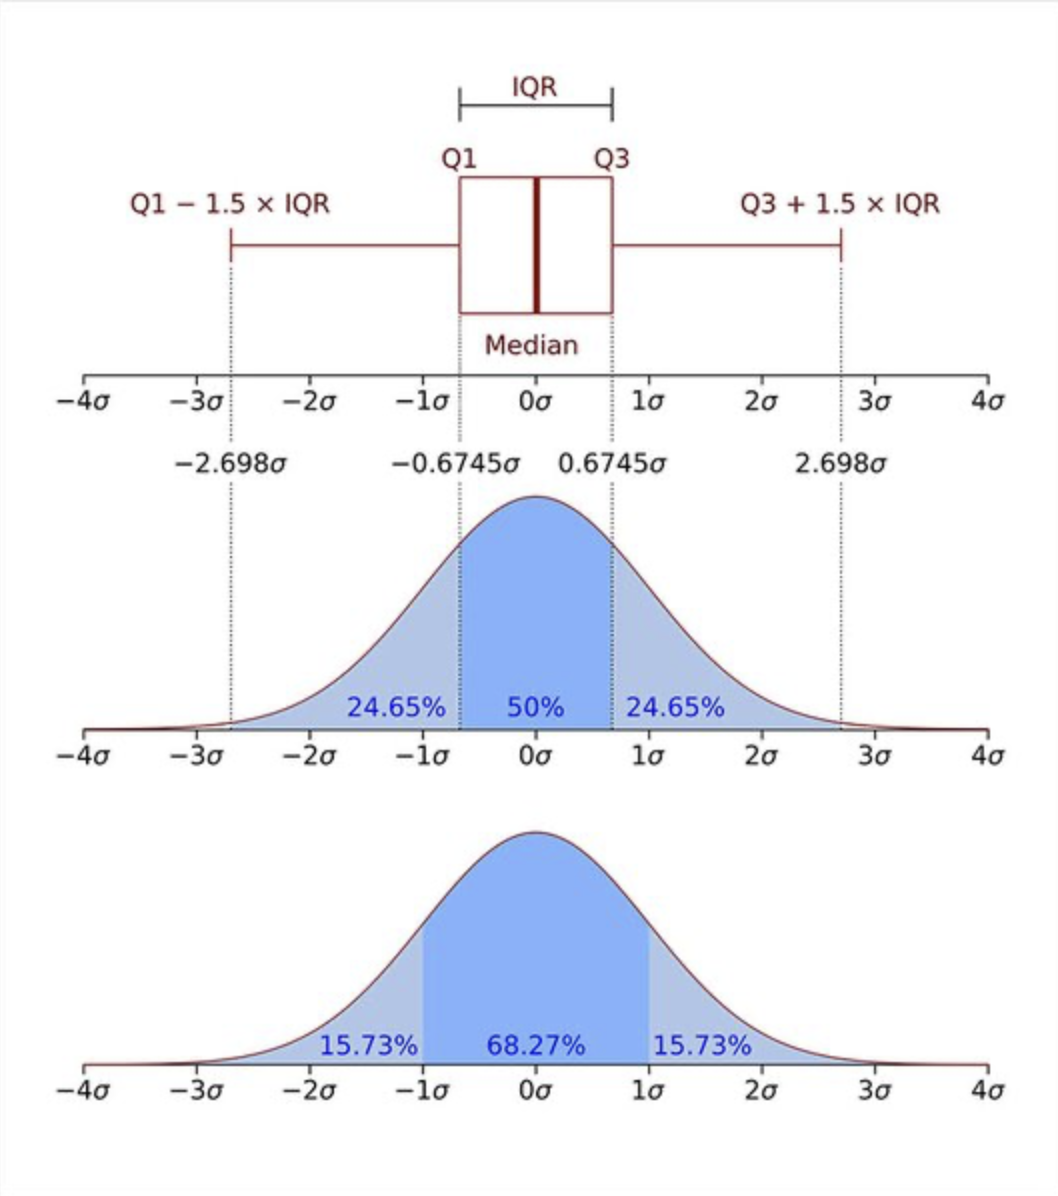

In [40]:
Q3, Q1 = np.percentile(data, [75 ,25])
IQR = Q3 - Q1
IQR

1.1644925829790964

In [41]:
data[(Q1-1.5*IQR > data) | (Q3+1.5*IQR < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

In [56]:
def outlier2(df, col):
    Q3, Q1 = np.percentile(df[col], [75, 25])
    IQR = Q3 - Q1
    return df[(Q1-1.5*IQR > df[col])|(Q3+1.5*IQR < df[col])].index

trade.loc[outlier2(trade, '무역수지')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


## 3-5. 정규화(Normalization)

- **Standardization**
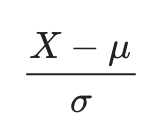
- **Min-Max Scaling**
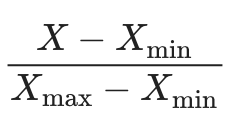

In [59]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

,A,B
0,4.613879,-1.484796
1,6.896902,-0.688995
2,9.609146,-1.774163
3,-2.142233,-0.225233
4,-1.079806,-1.527387
...,...,...
95,4.592298,-0.040122
96,2.900368,-1.160524
97,11.372830,-1.508950
98,0.309626,-0.596756


In [61]:
# 데이터 x를 Standardization 기법으로 정규화합니다. 
x_standardization = (x-x.mean())/x.std()
x_standardization

,A,B
0,0.187926,-0.498898
1,0.764840,0.270408
2,1.450216,-0.778630
3,-1.519325,0.718730
4,-1.250852,-0.540070
...,...,...
95,0.182472,0.897678
96,-0.245073,-0.185422
97,1.895894,-0.522248
98,-0.899747,0.359576


In [62]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.547954,0.395381
1,0.651383,0.567996
2,0.774256,0.332615
3,0.241880,0.668589
4,0.290012,0.386143
...,...,...
95,0.546976,0.708741
96,0.470326,0.465718
97,0.854157,0.390142
98,0.352957,0.588003


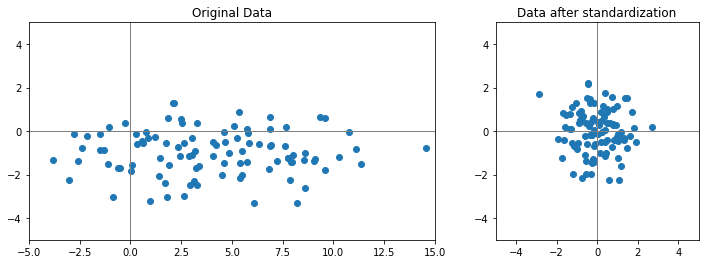

In [63]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

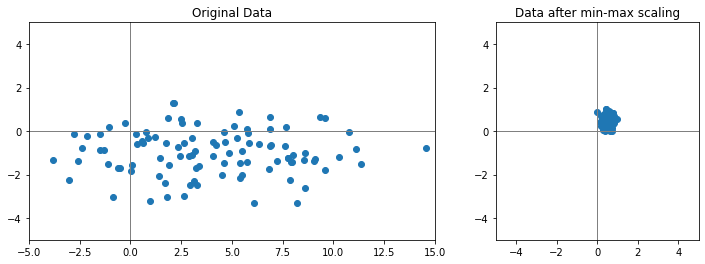

In [64]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

### Standardization
---

In [65]:
# trade 데이터를 standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_standardization = (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.255899
1,-0.689278,-0.252848,0.412529,-0.964444,0.400646
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.098217
3,-0.417598,0.852853,-0.576399,0.705292,0.831767
4,-0.764918,-0.389673,0.146306,-1.276341,0.437586


In [66]:
trade_standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.093143e-16,6.832142e-17,1.821904e-17,-5.465713e-17,4.099285e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.604200e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.117203e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.422420e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.457220e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.433663e+00


### Min-Max Scaling
---

In [67]:
# trade 데이터를 min-max scaling 기법으로 정규화합니다.
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660


In [68]:
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397289
std,0.156108,0.302099,0.235988,0.273790,0.247656
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])

In [71]:
# train 데이터와 test 데이터에 정규화를 적용해봅시다.
train_min = train.min()
train_max = train.max()

# 중요한 점은, test 데이터에 min-max scaling을 적용할 때도
# train 데이터 기준으로 수행해야 한다는 것입니다.
train_min_max = (train-train_min)/(train_max-train_min)
test_min_max = (train-train_min)/(train_max-train_min)

In [72]:
train_min_max

,0,1
0,0.0,0.0
1,0.5,1.0
2,1.0,0.5


In [73]:
test_min_max

,0,1
0,0.0,0.0
1,0.5,1.0
2,1.0,0.5


scikit-learn의 StandardScaler, MinMaxScaler를 사용하는 방법도 있습니다.

In [74]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()

In [75]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [76]:
scaler.transform(test)

array([[-0.25,  0.55]])